#  John Schueler
# Program 5 of NLP methodologies
# Recommended to run on Google Colab
# **Topics Covered**: 
BERT, transformers, Bing Liu score, lexicon pos/neg words, SVM model, sentence generation,  next word prediction, n gram model, Markovify package,  tf-idf, confusion matrix, logistic regression, binary classification, Naive Bayes, Random Forest and more

#Link to DisneylandReviews.csv (32MB) [link text](https://www.kaggle.com/datasets/arushchillar/disneyland-reviews)


In [ ]:
# pip installs
!pip install transformers


In [ ]:
# Install additional packages
!pip install markovify
!pip install nnsplit
!pip install nltk --upgrade

In [ ]:
# Install additional packages
!pip install scikit-learn --upgrade 
!pip install sklearn

In [ ]:
# Install additional packages
!pip install sentence_transformers

In [ ]:
# Install additional packages
!pip install markovify
!pip install nnsplit
!pip install nltk --upgrade

**Import Packages**

In [ ]:
import pandas as pd
import io
from google.colab import files

import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('opinion_lexicon')
nltk.download('vader_lexicon')
nltk.download('stopwords')

import string

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, roc_auc_score

from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import InputExample, InputFeatures

import tensorflow as tf


In [ ]:
from google.colab import files
import io

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from collections import Counter, defaultdict
from itertools import chain
import random
import markovify
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nnsplit
from nnsplit import NNSplit

In [ ]:
# Check your version of NLTK; upgrade as necessary to 3.6.5 avoid later runtime errors
import nltk
print('Version: {}.'.format(nltk.__version__))

Version: 3.6.5.


In [ ]:
#!pip install nltk --upgrade 

from nltk import RegexpTokenizer, sent_tokenize 
from nltk import bigrams, trigrams
nltk.download('punkt')


# Then restart the kernel/runtime if prompted

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Check your version of tensorflow; upgrade below as necessary to 2.6.0
import tensorflow as tf
print('Version: {}.'.format(tf.__version__))

Version: 2.7.0.


In [ ]:
# !pip install tensorflow --upgrade 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
import sklearn
print('Version: {}.'.format(sklearn.__version__))

Version: 1.0.1.


In [ ]:
import pandas as pd
import io
from google.colab import files

import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')

import string

import sklearn
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, roc_auc_score, average_precision_score 
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import InputExample, InputFeatures
from sentence_transformers import SentenceTransformer

import tensorflow as tf

from matplotlib import pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
import io

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from collections import Counter, defaultdict
from itertools import chain
import random
import markovify
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nnsplit
from nnsplit import NNSplit

In [ ]:
# Check your version of NLTK; upgrade as necessary to 3.6.5 avoid later runtime errors
import nltk
print('Version: {}.'.format(nltk.__version__))

Version: 3.6.5.


In [ ]:
#!pip install nltk --upgrade 

from nltk import RegexpTokenizer, sent_tokenize 
from nltk import bigrams, trigrams
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Check your version of tensorflow; upgrade below as necessary to 2.6.0
import tensorflow as tf
print('Version: {}.'.format(tf.__version__))

Version: 2.7.0.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from google.colab import files
import io

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from collections import Counter, defaultdict
from itertools import chain
import random
import markovify
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nnsplit
from nnsplit import NNSplit

In [ ]:
upload = files.upload()

Saving disneyland_reviews.csv to disneyland_reviews (2).csv


In [ ]:
d_rev = pd.read_csv(io.BytesIO(upload['disneyland_reviews.csv']), encoding='latin-1') # Note different encoding
# entire dataframe with all branches
d_rev 

In [ ]:
num_rows = len(d_rev.index)
# Breaking down the distribution of branches
d_rev['branch'].value_counts()/num_rows

Disneyland_California    0.472608
Disneyland_Paris         0.307535
Disneyland_HongKong      0.219858
Name: branch, dtype: float64

**Dataframe Manipulation**

In [ ]:
# Paris branch df
b = d_rev[d_rev['branch'] == 'Disneyland_Paris']


In [ ]:
# Hong Kong branch df
c = d_rev[d_rev['branch'] == 'Disneyland_HongKong']

In [ ]:
# all branches df
d_rev.head(10)

In [ ]:
# Hong Kong only branch df
c.head(10)

In [ ]:
# Paris only branch df
b.head(10)

In [ ]:
# Merging Paris and Hong Kong df's into 1 dataframe
a = pd.concat([b, c])

In [ ]:
a.head(10)

In [ ]:
num_rows = len(a['branch'])
# ratio of reviews by branch in new merged df
a.value_counts('branch')/num_rows

branch
Disneyland_Paris       0.583123
Disneyland_HongKong    0.416877
dtype: float64

In [ ]:
# Explore the lexicon
# Number of words
print(len(opinion_lexicon.words()))

# Examples of positive words
print(opinion_lexicon.positive()[:10])

# Examples of negative words
print(opinion_lexicon.negative()[:10])

6789
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [ ]:
# Create a dictionary-type object with positive = 1; negative = -1
word_dict = {}
pos_score = 1
neg_score = -1

# Add positive and negative Bing Liu words to dictionary
for word in opinion_lexicon.positive():
  word_dict[word] = pos_score

for word in opinion_lexicon.negative():
  word_dict[word] = neg_score

word_dict # Look at the dictionary

In [ ]:
# bing liu function
def bing_liu_score(text):
  sentiment_score = 0
  bag_of_words = word_tokenize(text.lower())
  for word in bag_of_words:
    if word in word_dict:
      sentiment_score += word_dict[word]
  return sentiment_score/len(bag_of_words)

In [ ]:
# applying bing liu score to merged dataframe
a['bing_liu_score'] = a['review_text'].apply(bing_liu_score)
a.sort_values(by= ['bing_liu_score'], ascending = False, inplace = True)
a.head(5)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,bing_liu_score
2711,314589035,5,1,2015-7,India,excellent service good quality nice managemen...,Disneyland_HongKong,0.357143
21302,213903626,5,1,2014-7,United States,Disney beauty place like the park great for wa...,Disneyland_Paris,0.350000
33464,131738658,4,1,2012-6,United Kingdom,"Excellent service , clean and well organised.....",Disneyland_Paris,0.333333
20651,266317781,5,1,2015-4,United Kingdom,Dreams came true. Unforgettable experience an...,Disneyland_Paris,0.300000
4273,124646142,5,1,2012-2,Malaysia,the greatest place of all. magical world. fant...,Disneyland_HongKong,0.272727


**Seperating** **Branches**

In [ ]:
# Seperating the merged dataframe by branch after applying bing liu score
HK_bl = a[a['branch'] == 'Disneyland_HongKong']

In [ ]:
HK_bl.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,bing_liu_score
2711,314589035,5,1,2015-7,India,excellent service good quality nice managemen...,Disneyland_HongKong,0.357143
4273,124646142,5,1,2012-2,Malaysia,the greatest place of all. magical world. fant...,Disneyland_HongKong,0.272727
23782,507700205,4,1,2016-9,Australia,Nice park and has some good rides . A good pla...,Disneyland_HongKong,0.250000
219,636984092,5,1,2018-11,Australia,the best every to go to the best every the bes...,Disneyland_HongKong,0.250000
4274,124459435,5,1,missing,Singapore,"excellent place, accomodating people, exciting...",Disneyland_HongKong,0.250000
2659,320581657,5,1,2015-10,United Kingdom,Slick and well managed. Everywhere very clean...,Disneyland_HongKong,0.250000
3204,244929248,5,1,2014-12,India,Superb Rides Superb Plan Superb Food Super...,Disneyland_HongKong,0.244898
23201,655333001,4,1,2018-12,Indonesia,Disneyland never failed to amuse everyone Exc...,Disneyland_HongKong,0.230769
3415,215095393,5,1,2013-8,Vietnam,"colorful and beautiful place, many creative ar...",Disneyland_HongKong,0.227273
3139,250746914,5,1,2014-9,India,Very Interesting theme park. Had a lots of fun...,Disneyland_HongKong,0.225806


In [ ]:
# Seperating the merged dataframe by branch after applying Bing Liu score
PA_bl = a[a['branch'] == 'Disneyland_Paris']

In [ ]:
PA_bl.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,bing_liu_score
21302,213903626,5,1,2014-7,United States,Disney beauty place like the park great for wa...,Disneyland_Paris,0.350000
33464,131738658,4,1,2012-6,United Kingdom,"Excellent service , clean and well organised.....",Disneyland_Paris,0.333333
20651,266317781,5,1,2015-4,United Kingdom,Dreams came true. Unforgettable experience an...,Disneyland_Paris,0.300000
18245,516366125,5,1,2016-9,Romania,"great fun, great characters, great shows and p...",Disneyland_Paris,0.260870
22679,127711668,5,1,2011-5,Ireland,A far better version of magic kingdom! Far bet...,Disneyland_Paris,0.260870
18193,521507862,5,1,2017-9,United Kingdom,I can't say enough about how much I love this ...,Disneyland_Paris,0.259259
17053,668132233,5,1,2019-4,Spain,It was amazing excellent exciting family tour ...,Disneyland_Paris,0.250000
19293,391637357,5,1,2016-7,United Kingdom,"Disney at its best. Clean fun. Well organised,...",Disneyland_Paris,0.250000
22647,129214584,5,1,2012-4,Malta,All the attractions are lovely. I recommend ge...,Disneyland_Paris,0.250000
18506,485013240,5,1,2017-5,Italy,Good experience. Good kid's rides. Great shows...,Disneyland_Paris,0.250000


**Paris Bing Liu Analysis**

In [ ]:
# Counting number of Paris branch reviews
PA_bl['branch'].value_counts()

Disneyland_Paris    11547
Name: branch, dtype: int64

In [ ]:
# df of only negative reviews for CA df
PA_bl_neg = PA_bl[PA_bl['bing_liu_score'] < 0]
PA_bl_neg.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,bing_liu_score
36001,39696463,2,0,missing,United States,I was allured by the invitation to have breakf...,Disneyland_Paris,-0.001067
35970,106896552,2,0,2011-4,United Kingdom,If you've never been to a Disney Park and are ...,Disneyland_Paris,-0.001117
22918,115605447,5,1,2011-7,France,Now I'm a massive cynic about these types of t...,Disneyland_Paris,-0.001441
35948,117955068,2,0,2011-8,Ireland,Let me start by saying that I am a seasoned ve...,Disneyland_Paris,-0.001453
35281,402462585,2,0,2016-3,United Kingdom,This was our second visit to Disneyland but th...,Disneyland_Paris,-0.001460
31322,433027808,4,1,2016-10,United Kingdom,We visited during October half term and it was...,Disneyland_Paris,-0.001481
37263,186692452,1,0,2013-11,United Kingdom,"We were a party of five, fifty something grand...",Disneyland_Paris,-0.001496
23049,29081732,5,1,missing,United Kingdom,Here's the funny thing about my first experien...,Disneyland_Paris,-0.001515
37516,28348600,1,0,missing,United Kingdom,"Disneyland Paris frustrating, inefficient, i...",Disneyland_Paris,-0.001536
37163,247365824,1,0,2014-12,United Kingdom,We are regular visitors to Disneyland Paris at...,Disneyland_Paris,-0.001629


In [ ]:
# count of negative Paris branch reviews.
PA_bl_neg['branch'].value_counts()

Disneyland_Paris    1524
Name: branch, dtype: int64

In [ ]:
# Create df of all positive Paris branch reviews.
PA_bl_pos = PA_bl[PA_bl['bing_liu_score'] > 0]
PA_bl_pos.head(10)

In [ ]:
# Count all positive reviews of Paris branch.
PA_bl_pos['branch'].value_counts()

Disneyland_Paris    9267
Name: branch, dtype: int64

In [ ]:
# Create df for neutral reviews of the Paris branch.
PA_bl_neu = PA_bl[PA_bl['bing_liu_score'] == 0]
PA_bl_neu.head(10)

In [ ]:
# Neutral Paris review count
PA_bl_neu['branch'].value_counts()

Disneyland_Paris    756
Name: branch, dtype: int64

**Hong Kong Bing Liu Analysis**


In [ ]:
# Count of all Hong Kong branch reviews.
HK_bl['branch'].value_counts()

Disneyland_HongKong    8255
Name: branch, dtype: int64

In [ ]:
# Create df of all negative reviews for Hong Kong branch.
HK_bl_neg = HK_bl[HK_bl['bing_liu_score'] < 0]
HK_bl_neg.head(10)

In [ ]:
# There are 502 negative reviews for Disneyland Hong Kong.
HK_bl_neg.count()

review_id            502
rating               502
rating_binary        502
year_month           502
reviewer_location    502
review_text          502
branch               502
bing_liu_score       502
dtype: int64

In [ ]:
# Create df of only positive reviews for Hong Kong branch.
HK_bl_pos = HK_bl[HK_bl['bing_liu_score'] > 0]
HK_bl_pos.head(10)

In [ ]:
# There are 7188 positive reviews for Disneyland Hong Kong.
HK_bl_pos.count()

review_id            7188
rating               7188
rating_binary        7188
year_month           7188
reviewer_location    7188
review_text          7188
branch               7188
bing_liu_score       7188
dtype: int64

In [ ]:
# Create df for neutral reviews of Hong Kong branch.
HK_bl_neu = HK_bl[HK_bl['bing_liu_score'] == 0]
HK_bl_neu.head(10)

In [ ]:
# There are 565 neutral reviews for Disneyland Hong Kong. 
HK_bl_neu.count()

review_id            565
rating               565
rating_binary        565
year_month           565
reviewer_location    565
review_text          565
branch               565
bing_liu_score       565
dtype: int64

**Ratios**


In [ ]:
# Disneyland Hong Kong ratio for positive reviews is number of positive HK reviews divided by number of total HK reviews.
HK_ratio_p = 7188/8255
print(f"The percentage of positive reviews for Disneyland Hong Kong is: {HK_ratio_p} or 87%.")


The percentage of positive reviews for Disneyland Hong Kong is: 0.8707450030284676 or 87%.


In [ ]:
# Disneyland Paris ratio for positive reviews is number of positive Paris reviews divided by number of total Paris reviews.
PA_ratio_p = 14902/17745
print(f"The percentage of positive reviews for Disneyland Paris is: {PA_ratio_p} or 84%.")


The percentage of positive reviews for Disneyland Paris is: 0.8397858551704706 or 84%.


In [ ]:
# Disneyland Hong Kong ratio for negative reviews is number of negative HK reviews divided by number of total HK reviews.
HK_ratio_n = 502/8255
print(f"The percentage of negative reviews for Disneyland Hong Kong is: {HK_ratio_n} or 6%.")

The percentage of negative reviews for Disneyland Hong Kong is: 0.06081162931556632 or 6%.


In [ ]:
# Disneyland Paris ratio for negative reviews is number of negative Paris reviews divided by number of total Paris reviews.
PA_ratio_n = 1493/17745
print(f"The percentage of negative reviews for Disneyland Paris is: {PA_ratio_n} or 8%.")


The percentage of negative reviews for Disneyland Paris is: 0.08413637644406875 or 8%.


In [ ]:
# Disneyland Hong Kong ratio for neutral reviews is number of neutral HK reviews divided by number of total HK reviews.
HK_ratio_n = 565/8255
print(f"The percentage of negative reviews for Disneyland Hong Kong is: {HK_ratio_n} or 7%.")

The percentage of negative reviews for Disneyland Hong Kong is: 0.06844336765596608 or 6%.


In [ ]:
# Disneyland Paris ratio for neutral reviews is number of neutral Paris reviews divided by number of total Paris reviews.
PA_ratio_n = 1350/17745
print(f"The percentage of negative reviews for Disneyland Paris is: {PA_ratio_n} or 8%.")

The percentage of negative reviews for Disneyland Paris is: 0.0760777683854607 or 8%.


Since the CA branch recieves more than twice as many total reviews than the HK branch, I have decided that comparing ratios of positive and negative reviews would be more fair when determining which branch recieves more positive or negatives reviews. According to my analysis, Disneyland HK recieves slightly more positive reviews with a percentage of 87%. Disneyland CA has 84% of their total reviews being positive. Neutral reviews were included in the total review count, so it would be possible for there the same branch to recieve more positive and negative reviews than the other branch. However, this scenario did not occur. Disneyland CA did recieve more negative reviews than Disneyland HK. Disneyland CA had 8% of its total reviews being negative, while Disneyland HK had 6% of its total reviews be negative.

**Disneyland Hong Kong Reviews Pie Chart**


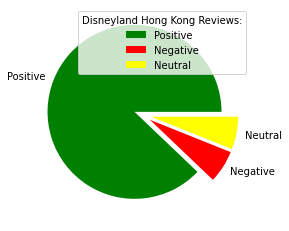

In [ ]:
HK_y = np.array([87, 6, 6])
labels_HK = ["Positive", "Negative", "Neutral"]
colors_HK = ["green", "red", "yellow"]
explode_HK = [0.1, 0.1, 0.1]
plt.pie(HK_y, labels = labels_HK, explode = explode_HK, colors = colors_HK)
plt.legend(title = "Disneyland Hong Kong Reviews:")
plt.show()

**Disneyland California Reviews Pie Chart**


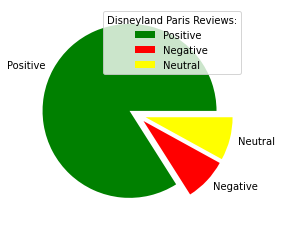

In [ ]:
PA_y = np.array([84, 8, 8])
labels_PA1 = ["Positive", "Negative", "Neutral"]
colors_PA = ["green", "red", "yellow"]
explode_PA = [0.1, 0.1, 0.1]
plt.pie(PA_y, explode = explode_PA, colors = colors_PA, labels = labels_PA1)
plt.legend(title = "Disneyland Paris Reviews:")
plt.show()

**3**

In [ ]:
# review original dataframe
d_rev.head(10)

In [ ]:
# filter dataframe for Paris
e = d_rev[d_rev['branch'] == 'Disneyland_Paris']
e.head(10)

In [ ]:
# concat dataframe for Paris and Hong Kong
pr_hk = pd.concat([e,c])

In [ ]:
num_rows = len(pr_hk['branch'])
# ratio of reviews by branch in new merged df
pr_hk.value_counts('branch')/num_rows

branch
Disneyland_Paris       0.583123
Disneyland_HongKong    0.416877
dtype: float64

In [ ]:
# get dummies for concat df
dummies = pd.get_dummies(pr_hk['branch'])
pr_hk1 = pd.concat([pr_hk, dummies], axis=1)
pr_hk1

In [ ]:
# count number of reviews for each branch
pr_hk1['branch'].value_counts()

Disneyland_Paris       11547
Disneyland_HongKong     8255
Name: branch, dtype: int64

In [ ]:
# review new dataframe
pr_hk1.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,Disneyland_HongKong,Disneyland_Paris
17035,670721950,5,1,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0,1
17036,670606796,5,1,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0,1
17037,670535589,5,1,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,0,1
17038,670400930,5,1,2019-4,United Kingdom,Such a magical experience. I recommend making ...,Disneyland_Paris,0,1
17039,670289145,5,1,missing,United Kingdom,My boyfriend took me here for my birthday this...,Disneyland_Paris,0,1
17040,670260744,5,1,2019-4,United Kingdom,Everything here is just amazing. Take your own...,Disneyland_Paris,0,1
17041,669948652,5,1,2019-4,Netherlands,"Not the same as Disney in the states, none of ...",Disneyland_Paris,0,1
17042,669869964,5,1,2019-4,Malta,This is a place everyone deserves to go at lea...,Disneyland_Paris,0,1
17043,669707947,5,1,2019-4,Ireland,3rd time hereIt gets betterPlenty to do for al...,Disneyland_Paris,0,1
17044,669618354,5,1,2019-4,Saudi Arabia,"I had been there twice with my grandson, I wi...",Disneyland_Paris,0,1


In [ ]:
# tokenize reviews
re_tokenizer = RegexpTokenizer("[\\w']+") 
pr_hk1['review_text_tok'] = pr_hk1['review_text'].apply(re_tokenizer.tokenize)
#  cleaning setup
punc = string.punctuation
digits = string.digits 
stopwords_nltk = nltk.corpus.stopwords.words('english')
# cleaning
pr_hk1['review_text_cleaned'] = pr_hk1['review_text_tok'].apply(lambda x: [word.lower() for word in x])
pr_hk1['review_text_cleaned'] = pr_hk1['review_text_cleaned'].apply(lambda x: [word for word in x if word not in digits]) 
pr_hk1['review_text_cleaned'] = pr_hk1['review_text_cleaned'].apply(lambda x: [word for word in x if word not in punc])
pr_hk1['review_text_cleaned'] = pr_hk1['review_text_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])


In [ ]:
#review new cleaned df
pr_hk1.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,Disneyland_HongKong,Disneyland_Paris,review_text_tok,review_text_cleaned
17035,670721950,5,1,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0,1,"[We've, been, to, Disneyland, Hongkong, and, T...","[we've, disneyland, hongkong, tokyo, far, one,..."
17036,670606796,5,1,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0,1,"[What, a, fantastic, place, the, queues, were,...","[fantastic, place, queues, decent, best, time,..."
17037,670535589,5,1,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,0,1,"[A, Trip, to, Disney, makes, you, all, warm, a...","[trip, disney, makes, warm, fuzzy, actual, kid..."
17038,670400930,5,1,2019-4,United Kingdom,Such a magical experience. I recommend making ...,Disneyland_Paris,0,1,"[Such, a, magical, experience, I, recommend, m...","[magical, experience, recommend, making, us, f..."
17039,670289145,5,1,missing,United Kingdom,My boyfriend took me here for my birthday this...,Disneyland_Paris,0,1,"[My, boyfriend, took, me, here, for, my, birth...","[boyfriend, took, birthday, year, god, he's, d..."
17040,670260744,5,1,2019-4,United Kingdom,Everything here is just amazing. Take your own...,Disneyland_Paris,0,1,"[Everything, here, is, just, amazing, Take, yo...","[everything, amazing, take, lunch, save, time,..."
17041,669948652,5,1,2019-4,Netherlands,"Not the same as Disney in the states, none of ...",Disneyland_Paris,0,1,"[Not, the, same, as, Disney, in, the, states, ...","[disney, states, none, usual, foods, none, les..."
17042,669869964,5,1,2019-4,Malta,This is a place everyone deserves to go at lea...,Disneyland_Paris,0,1,"[This, is, a, place, everyone, deserves, to, g...","[place, everyone, deserves, go, least, life, t..."
17043,669707947,5,1,2019-4,Ireland,3rd time hereIt gets betterPlenty to do for al...,Disneyland_Paris,0,1,"[3rd, time, hereIt, gets, betterPlenty, to, do...","[3rd, time, hereit, gets, betterplenty, allsho..."
17044,669618354,5,1,2019-4,Saudi Arabia,"I had been there twice with my grandson, I wi...",Disneyland_Paris,0,1,"[I, had, been, there, twice, with, my, grandso...","[twice, grandson, never, give, grandsons, neve..."


In [ ]:
# Set up training and test sets
# 80%; 20%
# Stratify on Disneyland_Paris
# Y = Disneyland_Paris
# X =  tfidf weighted vectors

X_train, X_test, Y_train, Y_test = train_test_split(pr_hk1['review_text_cleaned'], 
                                                    pr_hk1['Disneyland_Paris'],
                                                    test_size = 0.2,
                                                    stratify = pr_hk1['Disneyland_Paris'])

In [ ]:
# view objects for X_train
X_train

In [ ]:
# view objects for Y_train
Y_train

In [ ]:
# transform each item in the X list into strings
X_train_str = [' '.join(map(str, l)) for l in X_train]
X_test_str = [' '.join(map(str, l)) for l in X_test]

In [ ]:
# Making tfidf vectors here
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train_str)
X_test_tfidf = vectorizer.transform(X_test_str)

In [ ]:
# look at the object now
X_train_tfidf

<15841x27596 sparse matrix of type '<class 'numpy.float64'>'
	with 912138 stored elements in Compressed Sparse Row format>

**Binary Classification**

In [ ]:
# Here we are training the SVM model
svm_model = LinearSVC(random_state = 72)
# another optio nis...
#svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, Y_train)

LinearSVC(random_state=72)

In [ ]:
# Create predictions on our test set
Y_pred_svm = svm_model.predict(X_test_tfidf)
Y_pred_svm

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

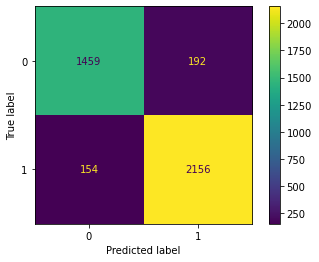

In [ ]:
# This is a confusion matrix. This shows us true positives, true negatives, false positives and false negatives.
cm = confusion_matrix(Y_test, Y_pred_svm, labels=svm_model.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=svm_model.classes_).plot()


In [ ]:
# These are performance metrics. These are ways to investigate the accuracy of your model through multiple calculations of parts of the confusion matrix.
# We will save the dataframe and add each different statistical model's metric results in order to compare and contrast model effectiveness.
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'AU ROC score', 'AU PRC score', 'MCC']
performance_metrics = pd.DataFrame([precision_score(Y_test, Y_pred_svm), 
                                    recall_score(Y_test, Y_pred_svm),
                                    accuracy_score(Y_test, Y_pred_svm),
                                    f1_score(Y_test, Y_pred_svm),
                                    roc_auc_score(Y_test, Y_pred_svm),
                                    average_precision_score(Y_test, Y_pred_svm),
                                    matthews_corrcoef(Y_test, Y_pred_svm)], index)

performance_metrics.columns = ['SVM']

performance_metrics

,SVM
Precision,0.918228
Recall,0.933333
Accuracy,0.912648
F1 score,0.925719
AU ROC score,0.908520
AU PRC score,0.895892
MCC,0.819892


**Binary Classification Using Logistic Regression**

In [ ]:
# Here we are training the logisitic regression model.
logit_model = LogisticRegression(random_state = 72)
logit_model.fit(X_train_tfidf, Y_train)

# Lets generate predictions for our test set.
Y_pred_logit = logit_model.predict(X_test_tfidf)

In [ ]:
# Now we add our performance metrics for the logistic regression model to our dataframe.
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'AU ROC score', 'AU PRC score', 'MCC']
logit_perf = pd.DataFrame([precision_score(Y_test, Y_pred_logit), 
                                    recall_score(Y_test, Y_pred_logit),
                                    accuracy_score(Y_test, Y_pred_logit),
                                    f1_score(Y_test, Y_pred_logit),
                                    roc_auc_score(Y_test, Y_pred_logit),
                                    average_precision_score(Y_test, Y_pred_logit),
                                    matthews_corrcoef(Y_test, Y_pred_logit)], index=index)

performance_metrics['Logistic regression'] = pd.Series(logit_perf[0])
performance_metrics

,SVM,Logistic regression
Precision,0.918228,0.903774
Recall,0.933333,0.943290
Accuracy,0.912648,0.908356
F1 score,0.925719,0.923110
AU ROC score,0.908520,0.901385
AU PRC score,0.895892,0.885594
MCC,0.819892,0.810972


**Binary Classification Using Naive Bayes**

In [ ]:
# Here we are training the Naive Bayes model.
nb_model = BernoulliNB()
nb_model.fit(X_train_tfidf.toarray(), Y_train)

# Lets generate predictions for our test set.
Y_pred_nb = nb_model.predict(X_test_tfidf.toarray())

In [ ]:
# Now we add our performance metrics for the Naive Bayes model to our dataframe.
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'AU ROC score', 'AU PRC score', 'MCC']
nb_perf = pd.DataFrame([precision_score(Y_test, Y_pred_nb), 
                                    recall_score(Y_test, Y_pred_nb),
                                    accuracy_score(Y_test, Y_pred_nb),
                                    f1_score(Y_test, Y_pred_nb),
                                    roc_auc_score(Y_test, Y_pred_nb),
                                    average_precision_score(Y_test, Y_pred_nb),
                                    matthews_corrcoef(Y_test, Y_pred_nb)], index=index)

performance_metrics['Naive Bayes'] = pd.Series(nb_perf[0])
performance_metrics

,SVM,Logistic regression,Naive Bayes
Precision,0.918228,0.903774,0.935528
Recall,0.933333,0.943290,0.590476
Accuracy,0.912648,0.908356,0.737440
F1 score,0.925719,0.923110,0.723992
AU ROC score,0.908520,0.901385,0.766770
AU PRC score,0.895892,0.885594,0.791236
MCC,0.819892,0.810972,0.545429


**Binary Classification Using Random Forest**

In [ ]:
# Here we are training the Naive Bayes model.
rf_model = RandomForestClassifier(random_state = 72)
rf_model.fit(X_train_tfidf, Y_train)

# Generate predictions on the test set
Y_pred_rf = rf_model.predict(X_test_tfidf)

In [ ]:

# Now we add our performance metrics for the Random Forest model to our dataframe.
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'AU ROC score', 'AU PRC score', 'MCC']
rf_perf = pd.DataFrame([precision_score(Y_test, Y_pred_rf), 
                                    recall_score(Y_test, Y_pred_rf),
                                    accuracy_score(Y_test, Y_pred_rf),
                                    f1_score(Y_test, Y_pred_rf),
                                    roc_auc_score(Y_test, Y_pred_rf),
                                    average_precision_score(Y_test, Y_pred_rf),
                                    matthews_corrcoef(Y_test, Y_pred_rf)], index=index)
# merge dataframe
performance_metrics['Random Forest'] = pd.Series(rf_perf[0])
performance_metrics

,SVM,Logistic regression,Naive Bayes,Random Forest
Precision,0.918228,0.903774,0.935528,0.868390
Recall,0.933333,0.943290,0.590476,0.945455
Accuracy,0.912648,0.908356,0.737440,0.884625
F1 score,0.925719,0.923110,0.723992,0.905285
AU ROC score,0.908520,0.901385,0.766770,0.872485
AU PRC score,0.895892,0.885594,0.791236,0.852833
MCC,0.819892,0.810972,0.545429,0.762896


I would say that 'accuracy' and 'precision' would be the 2 most insightful performance metrics in assessing model performance. The 'accuracy' metric informs us of how often the classifier is correct. This is a fundamentally important performance metric. 'Precision' is another very useful performance metric because it informs us of how accurate our model is at predicting yes. This helps us understand how prone to making false positives our model is.

**Binary Classification Using BERT**
(Google model released in 2018)

In [ ]:
# Here we initialize distilBERT model and tokenizer.


model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")




Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_79', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
# review the dataframe
pr_hk1.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,Disneyland_HongKong,Disneyland_Paris,review_text_tok,review_text_cleaned
17035,670721950,5,1,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0,1,"[We've, been, to, Disneyland, Hongkong, and, T...","[we've, disneyland, hongkong, tokyo, far, one,..."
17036,670606796,5,1,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0,1,"[What, a, fantastic, place, the, queues, were,...","[fantastic, place, queues, decent, best, time,..."
17037,670535589,5,1,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,0,1,"[A, Trip, to, Disney, makes, you, all, warm, a...","[trip, disney, makes, warm, fuzzy, actual, kid..."
17038,670400930,5,1,2019-4,United Kingdom,Such a magical experience. I recommend making ...,Disneyland_Paris,0,1,"[Such, a, magical, experience, I, recommend, m...","[magical, experience, recommend, making, us, f..."
17039,670289145,5,1,missing,United Kingdom,My boyfriend took me here for my birthday this...,Disneyland_Paris,0,1,"[My, boyfriend, took, me, here, for, my, birth...","[boyfriend, took, birthday, year, god, he's, d..."
17040,670260744,5,1,2019-4,United Kingdom,Everything here is just amazing. Take your own...,Disneyland_Paris,0,1,"[Everything, here, is, just, amazing, Take, yo...","[everything, amazing, take, lunch, save, time,..."
17041,669948652,5,1,2019-4,Netherlands,"Not the same as Disney in the states, none of ...",Disneyland_Paris,0,1,"[Not, the, same, as, Disney, in, the, states, ...","[disney, states, none, usual, foods, none, les..."
17042,669869964,5,1,2019-4,Malta,This is a place everyone deserves to go at lea...,Disneyland_Paris,0,1,"[This, is, a, place, everyone, deserves, to, g...","[place, everyone, deserves, go, least, life, t..."
17043,669707947,5,1,2019-4,Ireland,3rd time hereIt gets betterPlenty to do for al...,Disneyland_Paris,0,1,"[3rd, time, hereIt, gets, betterPlenty, to, do...","[3rd, time, hereit, gets, betterplenty, allsho..."
17044,669618354,5,1,2019-4,Saudi Arabia,"I had been there twice with my grandson, I wi...",Disneyland_Paris,0,1,"[I, had, been, there, twice, with, my, grandso...","[twice, grandson, never, give, grandsons, neve..."


In [ ]:
# This is the same dataset but just with non-cleaned tokens
X_train, X_test, Y_train, Y_test = train_test_split(pr_hk1['review_text_tok'], 
                                                    pr_hk1['Disneyland_Paris'],
                                                    test_size = 0.2,
                                                    stratify = pr_hk1['Disneyland_Paris']) # Stratify ensures equal distribution of 0/1 in training and test sets  

# Bring X and Y into a single entity for train and test the dataframes
# We re-string now
train = pd.concat([X_train, Y_train], axis=1).reset_index()
train['review_text_tok'] = train['review_text_tok'].apply(lambda x: " ".join(x))

test = pd.concat([X_test, Y_test], axis=1).reset_index()
test['review_text_tok'] = test['review_text_tok'].apply(lambda x: " ".join(x))

train

In [ ]:
# max length for arguments will be 200  
print((train['review_text_tok'].str.len()).max())
print((test['review_text_tok'].str.len()).max())

20084
10182


In [ ]:
# this will convert the data that we have into input examples for test and train
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, 
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  test_InputExamples = test.apply(lambda x: InputExample(guid=None, 
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, test_InputExamples

In [ ]:
# These are the column identifiers
DATA_COLUMN = 'review_text_tok'
LABEL_COLUMN = 'Disneyland_Paris'

In [ ]:
# These are InputExample objects
train_InputExamples, test_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

In [ ]:
# Here is the corresponding function
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=200):
    features = [] 

    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, 
            truncation=True)

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),),)


In [ ]:
# Call the function above on training and test InputExample objects
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(32)



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Here we compile BERT with GPU
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=test_data)

Epoch 1/2
992/992 [==============================] - 410s 401ms/step - loss: 0.2176 - accuracy: 0.9039 - val_loss: 0.1714 - val_accuracy: 0.9255
Epoch 2/2
992/992 [==============================] - 395s 399ms/step - loss: 0.0739 - accuracy: 0.9714 - val_loss: 0.2535 - val_accuracy: 0.9182


In [ ]:
# Generate predictions for test set
# Create list of strings for input into next step
X_test_strings = test['review_text_tok'].tolist()

In [ ]:
X_test_strings

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
test.head(10)

,index,review_text_tok,Disneyland_Paris
0,17195,Has a fantastic New Year at the park with the ...,1
1,2512,Having been to all the Disneylands World I can...,0
2,35936,Overall this is not a true representation of a...,1
3,22208,This the reason you go for and it does not dis...,1
4,25259,I enjoyed their parade so much It was a magica...,0
5,32171,I have been to Disneyland in California severa...,1
6,21928,Even though its a little delayed my childhood ...,1
7,25369,A grand attraction for kids but visit in winte...,0
8,17087,What an amazing experience Be sure to carry a ...,1
9,18673,I visited Disneyland Paris for the 8th time th...,1


**Cannot figure get the cell below to not run.**

error: ResourceExhaustedError: Exception encountered when calling layer "LayerNorm" (type LayerNormalization).

failed to allocate memory [Op:SquaredDifference]

Call arguments received:
  • inputs=tf.Tensor(shape=(3961, 200, 768), dtype=float32)

In [ ]:
# Use the model to predict whether the branch is Paris for the test set
tf_batch = tokenizer(X_test_strings, max_length=200, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)

Y_pred_bert = tf.argmax(tf_predictions, axis=1)
Y_pred_bert = Y_pred_bert.numpy()
Y_pred_bert

ResourceExhaustedError: ignored

In [ ]:
# Set up the Paris column as a numpy array to feed into sklearn's performance metric functions
Y_test = test['Disneyland_Paris'].to_numpy()
Y_test

KeyError: ignored

In [ ]:
# Add to performance_metrics dataframe
index = ['Precision', 'Recall', 'Accuracy', 'F1 score', 'AU ROC score', 'AU PRC score', 'MCC']
bert_perf = pd.DataFrame([precision_score(Y_test, Y_pred_bert), 
                                    recall_score(Y_test, Y_pred_bert),
                                    accuracy_score(Y_test, Y_pred_bert),
                                    f1_score(Y_test, Y_pred_bert),
                                    roc_auc_score(Y_test, Y_pred_bert),
                                    average_precision_score(Y_test, Y_pred_bert),
                                    matthews_corrcoef(Y_test, Y_pred_bert)], index=index)

performance_metrics['BERT'] = pd.Series(bert_perf[0])
performance_metrics

NameError: ignored

**Text Generation**

In [ ]:
# view datarame 
pr_hk1.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,Disneyland_HongKong,Disneyland_Paris,review_text_tok,review_text_cleaned
17035,670721950,5,1,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0,1,"[We've, been, to, Disneyland, Hongkong, and, T...","[we've, disneyland, hongkong, tokyo, far, one,..."
17036,670606796,5,1,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0,1,"[What, a, fantastic, place, the, queues, were,...","[fantastic, place, queues, decent, best, time,..."
17037,670535589,5,1,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,0,1,"[A, Trip, to, Disney, makes, you, all, warm, a...","[trip, disney, makes, warm, fuzzy, actual, kid..."
17038,670400930,5,1,2019-4,United Kingdom,Such a magical experience. I recommend making ...,Disneyland_Paris,0,1,"[Such, a, magical, experience, I, recommend, m...","[magical, experience, recommend, making, us, f..."
17039,670289145,5,1,missing,United Kingdom,My boyfriend took me here for my birthday this...,Disneyland_Paris,0,1,"[My, boyfriend, took, me, here, for, my, birth...","[boyfriend, took, birthday, year, god, he's, d..."
17040,670260744,5,1,2019-4,United Kingdom,Everything here is just amazing. Take your own...,Disneyland_Paris,0,1,"[Everything, here, is, just, amazing, Take, yo...","[everything, amazing, take, lunch, save, time,..."
17041,669948652,5,1,2019-4,Netherlands,"Not the same as Disney in the states, none of ...",Disneyland_Paris,0,1,"[Not, the, same, as, Disney, in, the, states, ...","[disney, states, none, usual, foods, none, les..."
17042,669869964,5,1,2019-4,Malta,This is a place everyone deserves to go at lea...,Disneyland_Paris,0,1,"[This, is, a, place, everyone, deserves, to, g...","[place, everyone, deserves, go, least, life, t..."
17043,669707947,5,1,2019-4,Ireland,3rd time hereIt gets betterPlenty to do for al...,Disneyland_Paris,0,1,"[3rd, time, hereIt, gets, betterPlenty, to, do...","[3rd, time, hereit, gets, betterplenty, allsho..."
17044,669618354,5,1,2019-4,Saudi Arabia,"I had been there twice with my grandson, I wi...",Disneyland_Paris,0,1,"[I, had, been, there, twice, with, my, grandso...","[twice, grandson, never, give, grandsons, neve..."


In [ ]:
# filter dataframe for Paris only
Paris = pr_hk1[pr_hk1['branch'] == 'Disneyland_Paris'].copy() 


In [ ]:
Paris.head(10)

,review_id,rating,rating_binary,year_month,reviewer_location,review_text,branch,Disneyland_HongKong,Disneyland_Paris,review_text_tok,review_text_cleaned
17035,670721950,5,1,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,0,1,"[We've, been, to, Disneyland, Hongkong, and, T...","[we've, disneyland, hongkong, tokyo, far, one,..."
17036,670606796,5,1,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,0,1,"[What, a, fantastic, place, the, queues, were,...","[fantastic, place, queues, decent, best, time,..."
17037,670535589,5,1,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,0,1,"[A, Trip, to, Disney, makes, you, all, warm, a...","[trip, disney, makes, warm, fuzzy, actual, kid..."
17038,670400930,5,1,2019-4,United Kingdom,Such a magical experience. I recommend making ...,Disneyland_Paris,0,1,"[Such, a, magical, experience, I, recommend, m...","[magical, experience, recommend, making, us, f..."
17039,670289145,5,1,missing,United Kingdom,My boyfriend took me here for my birthday this...,Disneyland_Paris,0,1,"[My, boyfriend, took, me, here, for, my, birth...","[boyfriend, took, birthday, year, god, he's, d..."
17040,670260744,5,1,2019-4,United Kingdom,Everything here is just amazing. Take your own...,Disneyland_Paris,0,1,"[Everything, here, is, just, amazing, Take, yo...","[everything, amazing, take, lunch, save, time,..."
17041,669948652,5,1,2019-4,Netherlands,"Not the same as Disney in the states, none of ...",Disneyland_Paris,0,1,"[Not, the, same, as, Disney, in, the, states, ...","[disney, states, none, usual, foods, none, les..."
17042,669869964,5,1,2019-4,Malta,This is a place everyone deserves to go at lea...,Disneyland_Paris,0,1,"[This, is, a, place, everyone, deserves, to, g...","[place, everyone, deserves, go, least, life, t..."
17043,669707947,5,1,2019-4,Ireland,3rd time hereIt gets betterPlenty to do for al...,Disneyland_Paris,0,1,"[3rd, time, hereIt, gets, betterPlenty, to, do...","[3rd, time, hereit, gets, betterplenty, allsho..."
17044,669618354,5,1,2019-4,Saudi Arabia,"I had been there twice with my grandson, I wi...",Disneyland_Paris,0,1,"[I, had, been, there, twice, with, my, grandso...","[twice, grandson, never, give, grandsons, neve..."


In [ ]:
# count null values for Paris
Paris.isnull().sum()

review_id              0
rating                 0
rating_binary          0
year_month             0
reviewer_location      0
review_text            0
branch                 0
Disneyland_HongKong    0
Disneyland_Paris       0
review_text_tok        0
review_text_cleaned    0
dtype: int64

In [ ]:
# subset df
Paris_subset = Paris.sample(n = 300, random_state = 50)
Paris_subset = Paris_subset.reset_index(drop = True)

In [ ]:
# English splitter model
splitter = NNSplit.load('en') 

In [ ]:
# split list
split_list = []
# for loop with split list
for row in Paris_subset['review_text']:
  splits = splitter.split([row])[0]
  split_list.append(splits)

In [ ]:
# append to dataframe
df_1 = list()

for line in split_list:
  for split in line:
    df_1.append(str(split))

df_1 = pd.DataFrame(df_1)
df_1.columns = ['review_text_line']

In [ ]:
# testing what we have
print(df_1.loc[4][0])

df_1.tail(10)

The reality is it is going to be busy, it is going to be cold and you are going to have to queue as this is a fantastic place. 


,review_text_line
3248,there isn't much in the way of white knuckle r...
3249,Do expect to queue and as a British citizen do...
3250,People will push past you and your children wi...
3251,If there is a long queue I would suggest getti...
3252,"The food is as you would expect, over priced n..."
3253,There is great attention to detail in the park...
3254,"For the lunchtime parade and closing show, peo..."
3255,"The lunchtime parade is short and ok, not that..."
3256,"The closing show however is fantastic, much be..."
3257,"All in all a great day, wear comfy shoes as lo..."


In [ ]:
# tokenization of reviews
re_tokenizer = RegexpTokenizer("[\\w']+")
df_1['review_text_token'] = df_1['review_text_line'].apply(re_tokenizer.tokenize)

In [ ]:
# lowercase all characters in reviews
df_1['review_text_token'] = df_1['review_text_token'].apply(lambda x: [word.lower() for word in x])

In [ ]:
# create tri grams
df_1['trigrams'] = df_1['review_text_token'].apply(lambda row: list(nltk.trigrams(row, ))) # Use the tokenized text
df_1.head(3)

,review_text_line,review_text_token,trigrams
0,This was our third visit to Disneyland Paris a...,"[this, was, our, third, visit, to, disneyland,...","[(this, was, our), (was, our, third), (our, th..."
1,"We arrived on Boxing day for a 3 night, 4 day ...","[we, arrived, on, boxing, day, for, a, 3, nigh...","[(we, arrived, on), (arrived, on, boxing), (on..."
2,"The whole place was very christmassy, the deco...","[the, whole, place, was, very, christmassy, th...","[(the, whole, place), (whole, place, was), (pl..."


In [ ]:
# trigrams are transformed into a list
trigrams_list = lines_df['trigrams'].tolist() # Convert column to list of lists
trigrams_list = list(chain(*trigrams_list)) # Flatten the lists to a single list
trigrams_list

[('this', 'was', 'our'),
 ('was', 'our', 'third'),
 ('our', 'third', 'visit'),
 ('third', 'visit', 'to'),
 ('visit', 'to', 'disneyland'),
 ('to', 'disneyland', 'paris'),
 ('disneyland', 'paris', 'and'),
 ('paris', 'and', 'our'),
 ('and', 'our', 'first'),
 ('our', 'first', 'over'),
 ('first', 'over', 'the'),
 ('over', 'the', 'christmas'),
 ('the', 'christmas', 'period'),
 ('we', 'arrived', 'on'),
 ('arrived', 'on', 'boxing'),
 ('on', 'boxing', 'day'),
 ('boxing', 'day', 'for'),
 ('day', 'for', 'a'),
 ('for', 'a', '3'),
 ('a', '3', 'night'),
 ('3', 'night', '4'),
 ('night', '4', 'day'),
 ('4', 'day', 'break'),
 ('day', 'break', 'staying'),
 ('break', 'staying', 'at'),
 ('staying', 'at', 'the'),
 ('at', 'the', 'disney'),
 ('the', 'disney', 'davy'),
 ('disney', 'davy', 'crockett'),
 ('davy', 'crockett', 'ranch'),
 ('the', 'whole', 'place'),
 ('whole', 'place', 'was'),
 ('place', 'was', 'very'),
 ('was', 'very', 'christmassy'),
 ('very', 'christmassy', 'the'),
 ('christmassy', 'the', 'decor

In [ ]:
# Placeholder for stat. lang. model
ngram_model = defaultdict(lambda: defaultdict(lambda: 0))

In [ ]:
# Counting the frequency of token repeats in the trigrams
for w1, w2, w3 in trigrams_list:
    ngram_model[(w1, w2)][w3] += 1

In [ ]:
# convert our totaled counts into probabilities
for w1_w2 in ngram_model:
    total_count = float(sum(ngram_model[w1_w2].values()))
    for w3 in ngram_model[w1_w2]:
        ngram_model[w1_w2][w3] /= total_count

In [ ]:
# testing what we have by predicting the next word
next_words = pd.DataFrame([dict(ngram_model['easy', 'to'])])
next_words = next_words.T
next_words = next_words.sort_values(by = 0, ascending = False)

pd.set_option("display.max_rows", None, "display.max_columns", None)
next_words

,0
access,0.285714
forget,0.142857
see,0.142857
read,0.142857
walk,0.142857
navigate,0.142857


**n gram model**

In [ ]:
# This is what actually predicts the review. It predicted a review would be: "easy to access and food for the 'happiest place on earth anymore all".
# This is pretty good, but a moderately competent English speaker would consider this poorly written by human standards, in my opinion.
text = ['easy', 'to']
sentence_finished = False
 
while not sentence_finished:
  # Select a random probability threshold  
  r = random.random()
  accumulator = .0

  canditate_next_words = list(ngram_model[tuple(text[-2:])].keys())

  if len(canditate_next_words) > 0:
    for word in canditate_next_words:
        accumulator += ngram_model[tuple(text[-2:])][word]
        # Select words that are above the probability threshold
        if accumulator >= r:
            text.append(word)
            break
  else:
    sentence_finished = True
  
print(' '.join([t for t in text if t]))

easy to walk off while i was disappointed nonetheless


**Markovify Package**

In [ ]:
# transform df_1 to a list with elements that are split by /n (a new line).
review_text_line = df_1['review_text_line'].values.tolist()

In [ ]:
# here we are constructing the model
markovify_model = markovify.NewlineText(review_text_line)

In [ ]:
# using a for loop with a range to print out 5 hypothetical reviews for Disneyland Paris.
for i in range(5):
    print(markovify_model.make_sentence()) # Can add max_chars = as argument to limit length of sentence

That ride then broke down all the negative aspects. 
There are only available on selected rides and shows. 
Disneyland Park with my children aged 2,4&7. 
I would liken it to paying 20 an hour in the other queue. 
I don't think we would have double triple better experience and a must see.


**The End**